### **PyTorch Computer Vision**

In [1]:
%pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [2]:


import torch
from torch import nn
import matplotlib.pyplot as plt

# let's see the pytorch version
torch.__version__

'2.6.0+cu124'

Computer Vision is the art of teaching a computer to see, like building a model to classify whether a photo is of a cat or a dog.

#### What we will learn?


| Topic                                           | Contents                                                                                                               |
|------------------------------------------------|------------------------------------------------------------------------------------------------------------------------|
| 0. Computer vision libraries in PyTorch        | PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out.                              |
| 1. Load data                                   | To practice computer vision, we'll start with some images of different pieces of clothing from [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). |
| 2. Prepare data                                | We've got some images, let's load them in with a PyTorch `DataLoader` so we can use them with our training loop.      |
| 3. Model 0: Building a baseline model          | Here we'll create a multi-class classification model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. |
| 4. Making predictions and evaluating model 0   | Let's make some predictions with our baseline model and evaluate them.                                                |
| 5. Setup device agnostic code for future models| It's best practice to write device-agnostic code, so let's set it up.                                                 |
| 6. Model 1: Adding non-linearity               | Experimenting is a large part of machine learning, let's try and improve upon our baseline model by adding non-linear layers. |
| 7. Model 2: Convolutional Neural Network (CNN) | Time to get computer vision specific and introduce the powerful convolutional neural network architecture.            |
| 8. Comparing our models                        | We've built three different models, let's compare them.                                                               |
| 9. Evaluating our best model                   | Let's make some predictions on random images and evaluate our best model.                                             |
| 10. Making a confusion matrix                  | A confusion matrix is a great way to evaluate a classification model, let's see how we can make one.                  |
| 11. Saving and loading the best performing model| Since we might want to use our model for later, let's save it and make sure it loads back in correctly.               |




### **Computer vision libraries in PyTorch**

There are some computer vision libraries we should be aware of:

- `torchvision` - Contains datasets, model architectures and image transformation often used for computer vision problems.

- `torchvision.datasets` - Here you'll find many example computer vision datatsets for a range of problems from image classification, object detection, image captioning, video classification and more.

- `torchvision.models` - This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch.

- `torchvision.transforms` - Often images need to be transformed (into numbers) before being used with a model, common image transformations are here.

- `torch.utils.data.Dataset` - Base dataset class of PyTorch

- `torch.utils.data.DataLoader` - Creates a python iterable over a dataset

In [3]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor


import matplotlib.pyplot as plt


# check the versions

print(f"PyTorch version: {torch.__version__}")
print(f"torchvision version: {torchvision.__version__}")

PyTorch version: 2.6.0+cu124
torchvision version: 0.21.0+cu124


### **Getting a dataset**


To begin working with it, we need to get a computer vision dataset, we will be going to use `FashionMNIST` dataset. Where MNIST stands for Modified Institute of Standards and Technology.


`torchvision.datasets` contains a lot of example datasets that we can make use of while testing our computer vision knowledge. FashionMNIST is one of those instances, and since it has 10 different image classes, it is a multi-class classification problem



To make use of the FashionMNIST dataset from PyTorch, we will load this data:

In [4]:
# load training data
train_data = datasets.FashionMNIST(
    root='data', # name of the folder where you want to save or download the data to
    train = True, # Boolean, which basically asks you want the training or test split
    download=True, # again a bool, asking whether the data should be downloaded
    transform=ToTensor(), # the images come as a PIL format, we want to convert them to Torch.Tensor
    target_transform=None # do wwe want to transform the target labels as well?
)


# now the testing data

test_data = datasets.FashionMNIST(
    root = 'data', # as mentioned above
    train = False, # this will be false, since this is the training data
    download = True , # yes since we are downloading
    transform=ToTensor() # as mentioned above
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 172kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.19MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.1MB/s]


The data is downloaded, we can take a look at it

In [5]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
print(f"Label: {label}")

Image shape: torch.Size([1, 28, 28])
Label: 9


In [6]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [7]:
print(f"Image shape: {image.shape}")

Image shape: torch.Size([1, 28, 28])


this is
`[color_channels = 1 , height = 28, width = 28]`

Color chanel = 1, means that the image is grayscale

#### Input and Output shapes of a computer vision model

Various problems will have various input and output shapes, but the premise remains:
- encode data into numbers
- build a model to find pattenrs in those numbers
- convert those patterns into something meaningful


If the color channel = 3, then the image is in RGB. Typically in pytorch we have `NCHW` or `NHWC` format, where `N` stands for number of images. PyToch explains that using `NHWC` i.e. Channels last performs better and is considered a better practice.


Since we are dealing with a small dataset, it won't matter for now, but we will deal with this in later exaamples.

In [8]:
# let's see the train data

print(f"Number of train data : {len(train_data.data)}")
print(f"Number of test data : {len(test_data.data)}")

# now the targets

print(f"Number of train targets : {len(train_data.targets)}")
print(f"Number of test targets : {len(test_data.targets)}")

Number of train data : 60000
Number of test data : 10000
Number of train targets : 60000
Number of test targets : 10000


So we have `60,000` training samples and `10,000` testing samples

In [9]:
# what are the labels/classes
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

So we are dealing with `10` different kind of clothing, hence a `multi-class classification`

### **Visualizing our data**

Image Shape: torch.Size([1, 28, 28])
Label: 9


Text(0.5, 1.0, '9')

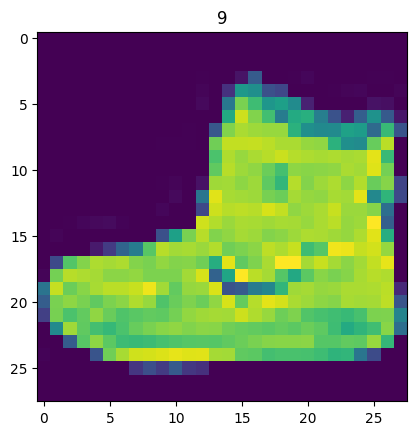

In [10]:
image,label = train_data[0]

print(f"Image Shape: {image.shape}")
print(f"Label: {label}")

plt.imshow(image.squeeze())
plt.title(label)

`9` means ankle boots.


We can make this image into grayscale as well

Text(0.5, 1.0, 'Ankle boot')

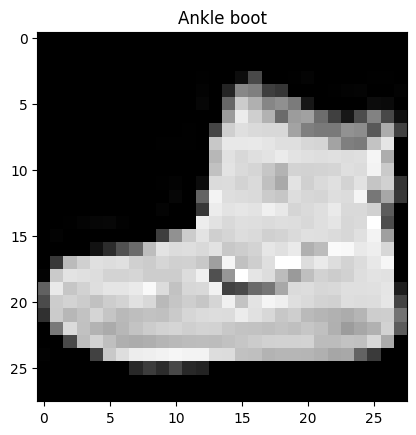

In [11]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_name[label])

Let's view a few more

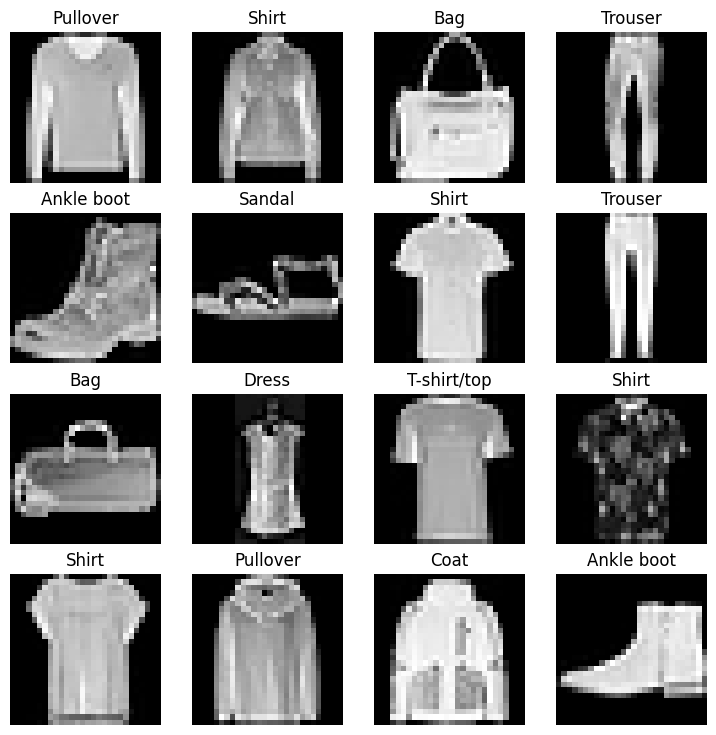

In [12]:
torch.manual_seed(135)

fig = plt.figure(figsize=(9,9))
rows, cols = 4,4

for i in range(1, rows*cols + 1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(class_name[label])
  plt.axis(False)


The model take pixel values, and then find patterns in them to use on future pixel values

### **Preparing DataLoader**

We need to prepare data using `torch.utils.data.Dataloader` , it helps load data into a model for training and for inference. It turns a large `Dataset` into a Python iterable of smaller chunks. The smaller chunks are called `batches` and can be set by `batch_size` parameter.


It's computationally efficient to do this, since we have a very large dataset, it also gives our model more opportunities to improve.

With mini-batches, gradient descent is performed more often per epoch ( once per mini-batch rather than once per epoch)

Value of `batch_size` is an hyperparameter, and we can try all different kinds of values, but usually some powers of 2 are most common choices

In [13]:
from torch.utils.data import DataLoader
# setting up the hyperparameter

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,  # the training data to make it iterable
                              batch_size=BATCH_SIZE, # how many samples per batch
                              shuffle=True) # everyday I am shuffling



test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False) # we don't have to shuffle the test data



train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ad136627550>,
 <torch.utils.data.dataloader.DataLoader at 0x7ad1341e7e10>)

In [14]:
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [15]:
print(1875*32, 312*32, 313*32)

60000 9984 10016


In [16]:
# what's inside

train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

and we can see that data remains unchanged

Image shape: torch.Size([1, 28, 28])
Label: 6


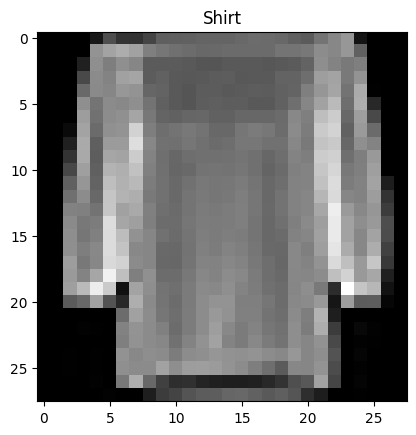

In [17]:
torch.manual_seed(135)

random_idx = torch.randint(0,len(train_features_batch), size = [1]).item()

image, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_name[label])

print(f"Image shape: {image.shape}")
print(f"Label: {label}")

### **Building a Baseline model**

We build a baseline model using `nn.Module`, it's the simplest model we can imagine, we use this as a starting point and then improve upon it with subsequent and more complicated models.  The baseline model will be two `nn.Linear()` layers, and since we are working with image data, we will have to flatten the data using `nn.Flatten()` layer

In [18]:
flatten_model = nn.Flatten()

# let's take one sample
x = train_features_batch[0]

# flatten it
output = flatten_model(x)

print(f"Shape before flatten: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flatten: {output.shape}-> [color_channels, height*width")

Shape before flatten: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flatten: torch.Size([1, 784])-> [color_channels, height*width


We turn the pixel ddata from height and width dimensions into one long feature vector, and `nn.Linear()` layers likes their input to be feature vectors.

In [19]:
class FashionMNISTModelv0(nn.Module):
  def __init__(self,input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )


  def forward(self,x):
    return self.layer_stack(x)



- `input_shape = 784` : Why? These are the features going into our model, it's every pixel in the target image( 28 pixels high by 28 pixels wide = 784 features)

- `hidden_units=10` : Number of units/neurons in the hidden layers, this number can be anything

- `output_shape = len(class_name)` : Since we are working with a multi-class classification problem, we need one neuron per class

In [20]:
torch.manual_seed(135)


model_v0 = FashionMNISTModelv0(input_shape=784, hidden_units=20, output_shape=len(class_name))
model_v0.to("cpu")



FashionMNISTModelv0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=10, bias=True)
  )
)

#### Setup loss, optimizer and evaluation metrics

Let's bring back our `helper_functions`

In [21]:
### Helper function

"""
A series of helper functions used throughout the course.

If a function gets defined once and could be used over and over, it'll go in here.
"""
import torch
import matplotlib.pyplot as plt
import numpy as np

from torch import nn

import os
import zipfile

from pathlib import Path

import requests

# Walk through an image classification directory and find out how many files (images)
# are in each subdirectory.
import os

def walk_through_dir(dir_path):
    """
    Walks through dir_path returning its contents.
    Args:
    dir_path (str): target directory

    Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    # Adjusted to handle multi-dimensional input by taking only the first two features for plotting
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Determine the number of input features expected by the model
    try:
        # Try accessing in_features for models with a linear_layer_stack (like BlobModelv1)
        in_features = model.linear_layer_stack[0].in_features
    except AttributeError:
        try:
            # If linear_layer_stack is not found, assume it's a Sequential model
            # and access the in_features of the first layer directly
             in_features = model[0].in_features
        except TypeError:
            # If it's a custom model with layers as attributes (like CircleModelv1)
            in_features = model.layer_1.in_features


    # Make predictions
    model.eval()
    with torch.inference_mode():
        # Pass only the first two features to the model if the model expects 2 features
        # Otherwise, pass the original X_to_pred_on (which will fail if model expects > 2 features)
        if in_features == 2:
            y_logits = model(X_to_pred_on)
        else:
             # For models with more than 2 input features, we can't directly plot the decision boundary in 2D.
             # Let's predict on the original X data for visualization purposes.
             y_logits = model(X[:, :in_features])


    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    # Need to handle cases where y_pred is not reshaped due to predicting on original X
    if y_pred.shape[0] == xx.ravel().shape[0]:
        y_pred = y_pred.reshape(xx.shape).detach().numpy()
        plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
        plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
    else:
        # If we predicted on the original X, just plot the scatter points with predictions
        plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, cmap=plt.cm.RdYlBu)


# Plot linear data or training and test and predictions (optional)
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})


# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


def print_train_time(start, end, device=None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"\nTrain time on {device}: {total_time:.3f} seconds")
    return total_time


# Plot loss curves of a model
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()


# Pred and plot image function from notebook 04
# See creation: https://www.learnpytorch.io/04_pytorch_custom_datasets/#113-putting-custom-image-prediction-together-building-a-function
from typing import List
import torchvision


def pred_and_plot_image(
    model: torch.nn.Module,
    image_path: str,
    class_names: List[str] = None,
    transform=None,
    device: torch.device = "cuda" if torch.cuda.is_available() else "cpu",
):
    """Makes a prediction on a target image with a trained model and plots the image.

    Args:
        model (torch.nn.Module): trained PyTorch image classification model.
        image_path (str): filepath to target image.
        class_names (List[str], optional): different class names for target image. Defaults to None.
        transform (_type_, optional): transform of target image. Defaults to None.
        device (torch.device, optional): target device to compute on. Defaults to "cuda" if torch.cuda.is_available() else "cpu".

    Returns:
        Matplotlib plot of target image and model prediction as title.

    Example usage:
        pred_and_plot_image(model=model,
                            image="some_image.jpeg",
                            class_names=["class_1", "class_2", "class_3"],
                            transform=torchvision.transforms.ToTensor(),
                            device=device)
    """

    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255.0

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(
        target_image.squeeze().permute(1, 2, 0)
    )  # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False)

def set_seeds(seed: int=42):
    """Sets random sets for torch operations.

    Args:
        seed (int, optional): Random seed to set. Defaults to 42.
    """
    # Set the seed for general torch operations
    torch.manual_seed(seed)
    # Set the seed for CUDA torch operations (ones that happen on the GPU)
    torch.cuda.manual_seed(seed)

def download_data(source: str,
                  destination: str,
                  remove_source: bool = True) -> Path:
    """Downloads a zipped dataset from source and unzips to destination.

    Args:
        source (str): A link to a zipped file containing data.
        destination (str): A target directory to unzip data to.
        remove_source (bool): Whether to remove the source after downloading and extracting.

    Returns:
        pathlib.Path to downloaded data.

    Example usage:
        download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                      destination="pizza_steak_sushi")
    """
    # Setup path to data folder
    data_path = Path("data/")
    image_path = data_path / destination

    # If the image folder doesn't exist, download it and prepare it...
    if image_path.is_dir():
        print(f"[INFO] {image_path} directory exists, skipping download.")
    else:
        print(f"[INFO] Did not find {image_path} directory, creating one...")
        image_path.mkdir(parents=True, exist_ok=True)

        # Download pizza, steak, sushi data
        target_file = Path(source).name
        with open(data_path / target_file, "wb") as f:
            request = requests.get(source)
            print(f"[INFO] Downloading {target_file} from {source}...")
            f.write(request.content)

        # Unzip pizza, steak, sushi data
        with zipfile.ZipFile(data_path / target_file, "r") as zip_ref:
            print(f"[INFO] Unzipping {target_file} data...")
            zip_ref.extractall(image_path)

        # Remove .zip file
        if remove_source:
            os.remove(data_path / target_file)

    return image_path

In [22]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_v0.parameters(), lr = 0.2)

### Time our experiments

Let's compare the time it takes for CPU to train as compared to GPU to train

In [23]:
from timeit import default_timer as timer

def print_train_time(start:float, end:float, device: torch.device = None):

  total_time = end - start
  print(f"Train time on {device}: {end-start:.3f} seconds")

  return total_time

### **Training Loop**

Let's create a training loop and a testing loop to evaluate our model. Our batches are contained within `DataLoader`, `train_dataloader` and `test_dataloader` for training and testing data splits.

And since we are computing on batches of data, our loss and evaluation metrics will be calculated per batch, rather than the whole dataset.


This means we have to divide our loss and accuracy values by the number of batches in each dataset's respective dataloader.


- Loop through epochs
  - Loop through training batches, performing training steps, calculate the train loss per batch
  - Loop through teseting batches, perform testing steps, calculate the test loss per batch
- print out what's happening
= time it all

In [24]:
from tqdm.auto import tqdm

# random seed
torch.manual_seed(135)

train_time_start_on_cpu = timer()
epochs = 5

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")

    ### Training
    model_v0.train()
    train_loss = 0.0

    for batch, (X, y) in enumerate(train_dataloader):
        y_pred = model_v0(X)
        loss   = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 400 == 0:
            seen = batch * X.size(0)
            total = len(train_dataloader.dataset)
            print(f"Looked at {seen}/{total} samples")

    train_loss /= len(train_dataloader)

    ### Testing
    model_v0.eval()
    test_loss, test_acc = 0.0, 0.0

    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_v0(X)
            test_loss += loss_fn(test_pred, y).item()
            test_acc  += accuracy_fn(y_true=y,
                                     y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc  /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.5f} | "
          f"Test loss: {test_loss:.5f}, "
          f"Test acc: {test_acc:.2f}%\n")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(
    start=train_time_start_on_cpu,
    end=train_time_end_on_cpu,
    device=str(next(model_v0.parameters()).device)
)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.61488 | Test loss: 0.56004, Test acc: 80.14%

Epoch: 1
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.51101 | Test loss: 0.52961, Test acc: 80.33%

Epoch: 2
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.63866 | Test loss: 0.48728, Test acc: 83.02%

Epoch: 3
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.48409 | Test loss: 0.48928, Test acc: 82.77%

Epoch: 4
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000

#### Debugging

In [25]:
# torch.manual_seed(135)
# epochs = 5

# # turn on anomaly detection to pinpoint bad ops
# torch.autograd.set_detect_anomaly(True)

# for epoch in tqdm(range(epochs)):
#     print(f"Epoch: {epoch}\n---------")

#     model_v0.train()
#     train_loss = 0.0

#     for batch, (X, y) in enumerate(train_dataloader):
#         # -- DEBUG the very first batch --
#         if epoch == 0 and batch == 0:
#             print("⚠️  Debug batch 0  ⚠️")
#             print("  X dtype:", X.dtype,
#                   "| min:", X.min().item(),
#                   "| max:", X.max().item(),
#                   "| mean:", X.float().mean().item())
#             out = model_v0(X)
#             print("  out min:", out.min().item(),
#                   "| max:", out.max().item(),
#                   "| any NaN?", torch.isnan(out).any().item())
#         # ---------------------------------

#         optimizer.zero_grad()
#         y_pred = model_v0(X)
#         loss   = loss_fn(y_pred, y)

#         # check if loss is already NaN
#         if torch.isnan(loss):
#             raise RuntimeError(f"❌ NaN loss at epoch {epoch}, batch {batch}")

#         loss.backward()
#         # optional gradient clipping
#         torch.nn.utils.clip_grad_norm_(model_v0.parameters(), 1.0)
#         optimizer.step()

#         train_loss += loss.item()

#         if batch % 400 == 0:
#             seen = batch * X.size(0)
#             total = len(train_dataloader.dataset)
#             print(f"Looked at {seen}/{total} samples")

#     train_loss /= len(train_dataloader)

#     # Testing (make sure to .item() your test_loss too)
#     model_v0.eval()
#     test_loss, test_acc = 0.0, 0.0
#     with torch.inference_mode():
#         for X, y in test_dataloader:
#             test_pred = model_v0(X)
#             test_loss += loss_fn(test_pred, y).item()
#             test_acc  += accuracy_fn(y_true=y,
#                                      y_pred=test_pred.argmax(dim=1))
#     test_loss /= len(test_dataloader)
#     test_acc  /= len(test_dataloader)

#     print(f"\nTrain loss: {train_loss:.5f} | "
#           f"Test loss: {test_loss:.5f}, "
#           f"Test acc: {test_acc:.2f}%\n")

In [26]:
# nan_layers = []

# def find_nan_hook(module, inp, out):
#     if torch.isnan(out).any():
#         nan_layers.append((module, out))

# # register hooks
# handles = []
# for module in model_v0.modules():
#     handles.append(module.register_forward_hook(find_nan_hook))

# # run one batch to trigger the hooks
# X, _ = next(iter(train_dataloader))
# model_v0.train()
# _ = model_v0(X)

# # remove hooks
# for h in handles:
#     h.remove()

# # report
# if nan_layers:
#     print("⚠️ NaNs found in these modules (in order):")
#     for module, out in nan_layers:
#         print(f" - {module.__class__.__name__}")
# else:
#     print("No NaNs detected by hooks. Weird…")


### Making Predictions

It's good idea to write some code to evaluate the models. Since we are going to build a few models, it's a good idea to write some code to evaluate them all in similar ways.


We will make a function that takes in a trained model, a `DataLoader`, a loss function and an accuracy function. This function will use the model to make predictions on the data in the `DataLoader` and then we can evaluate those predictions using the loss function and accuracy function

In [27]:
torch.manual_seed(135)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_func: torch.nn.Module,
               accuracy_fn):


  """
  Returns a dictionary containing the results of model predicting on data_loader.

  Args:
    model (torch.nn.Module): A trained (or untrained) PyTorch capable of making predicitons
    data_loader (torch.utils.data.DataLoader): The target dataset to prediction on
    loss_func (torch.nn.Module): The loss function of model
    accuracy_fn: An accuracy function to compare the models predicitons

  Returns:
    (dict): Results of model making predictions on data_loader
  """


  loss, acc = 0,0

  model.eval()  # evaluate the model

  with torch.inference_mode():
    for X, y in data_loader:
      y_pred = model(X)  # make the predictions
      loss += loss_func(y_pred, y) # aacumulate the loss

      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # accumulate the accuracy


    # scale the loss and accuracy to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)



  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}




In [28]:
# let's test for model 0

model_v0_results = eval_model(model=model_v0,
                              data_loader=test_dataloader,
                              loss_func=loss_fn,
                              accuracy_fn=accuracy_fn)

model_v0_results

{'model_name': 'FashionMNISTModelv0',
 'model_loss': 0.4855427145957947,
 'model_acc': 83.09704472843451}

Works fine, now we can make use of this function to evaluate

#### Device Agnostic Code

We know how much does it takes for CPU to train the model, now let's make the code device agnostic and test on GPU

In [29]:

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### **Better Model with Non-Linearity**

We know that non-linear model worked better in the previous tutorials, seeing the data, do you think we need non-linear functions?

let's test this

In [30]:
# a non-linear model
class FashionMNISTModelv1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(), # flatten the input into a single vector
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )


  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

Follow the same steps we did for the `FashionMNISTModelv0` and let's see

In [31]:
torch.manual_seed(135)

model_v1 = FashionMNISTModelv1(input_shape=784,
                               hidden_units=20,
                               output_shape=len(class_name)).to(device)


next(model_v1.parameters()).device # check the model device

device(type='cuda', index=0)

### Loss and Optimizer

In [32]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_v1.parameters(), lr=0.1)

### **Training and Testing Loops**

As we did with the above function, we will also functionize these loops, so that they can be called over and over again. Since we are using device agnostic code, make sure to add `.to(device)` wherever necessary

In [33]:
def train_step(model: torch.nn.Module, # the pytorch model
               data_loader: torch.utils.data.DataLoader, # the trainin and tesintg data
               loss_func : torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  train_loss, train_acc = 0,0

  model.to(device) # shift the model to device

  for batch, (X,y) in enumerate(data_loader):
    # send the data to GPU
    X,y = X.to(device), y.to(device)


    # forward pass
    y_pred = model(X)

    # loss calculation

    loss = loss_fn(y_pred, y)
    train_loss += loss

    # accuracy calculation
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))


    # optimizer zero grad
    optimizer.zero_grad()


    # loss backward
    loss.backward()

    # optimizer step
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)


  print(f"Train Loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_func : torch.nn.Module,
              accuracy_fn,
              device : torch.device = device):


  test_loss, test_acc = 0,0
  model.to(device)

  model.eval()


  # turn on inference
  with torch.inference_mode():
    for X,y in data_loader:
      X, y = X.to(device), y.to(device)

      test_pred = model(X)

      test_loss += loss_func(test_pred,y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)


    print(f"Test Loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")

These functions will run under another `for` loop over the `epochs`

In [34]:
torch.manual_seed(135)

# measure time
from timeit import default_timer as timer

train_time_start_on_gpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")

  train_step(data_loader=train_dataloader,
             model = model_v1,
             loss_func=loss_func,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn
             )

  test_step(data_loader=test_dataloader,
            model = model_v1,
            loss_func=loss_func,
            accuracy_fn=accuracy_fn)


train_time_end_on_gpu = timer()

total_train_time_model_1 = print_train_time(
    start=train_time_start_on_gpu,
    end=train_time_end_on_gpu, device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train Loss: 0.75943 | Train accuracy: 74.79%
Test Loss: 0.51203 | Test accuracy: 82.06%
Epoch: 1
---------
Train Loss: 0.44555 | Train accuracy: 84.16%
Test Loss: 0.47168 | Test accuracy: 82.51%
Epoch: 2
---------
Train Loss: 0.40758 | Train accuracy: 85.24%
Test Loss: 0.41731 | Test accuracy: 85.13%
Epoch: 3
---------
Train Loss: 0.38825 | Train accuracy: 85.98%
Test Loss: 0.40486 | Test accuracy: 85.51%
Epoch: 4
---------
Train Loss: 0.37648 | Train accuracy: 86.22%
Test Loss: 0.41785 | Test accuracy: 85.18%
Train time on cuda: 47.184 seconds


Sometimes the dataset we are working with is so small, that the benefits of using a GPU are outweighed by the time it actually takes to transfer the data there. There's a small bottleneck between copying data from the CPU memory to the GPY memory

Let's evaluate our trained model `model_v1` using `eval_mode()`, but before that, keep in mind that the data and model are set up using device agnostic code, but not the evaluation function, so update it before running

In [35]:
torch.manual_seed(135)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_func: torch.nn.Module,
               accuracy_fn,
               device : torch.device = device):


  """
  Returns a dictionary containing the results of model predicting on data_loader.

  Args:
    model (torch.nn.Module): A trained (or untrained) PyTorch capable of making predicitons
    data_loader (torch.utils.data.DataLoader): The target dataset to prediction on
    loss_func (torch.nn.Module): The loss function of model
    accuracy_fn: An accuracy function to compare the models predicitons

  Returns:
    (dict): Results of model making predictions on data_loader
  """


  loss, acc = 0,0

  model.eval()  # evaluate the model

  with torch.inference_mode():
    for X, y in data_loader:

      X, y = X.to(device), y.to(device)
      y_pred = model(X)  # make the predictions
      loss += loss_func(y_pred, y) # aacumulate the loss

      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1)) # accumulate the accuracy


    # scale the loss and accuracy to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)



  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}




In [36]:
model_v1_results = eval_model(model=model_v1,
                              data_loader=test_dataloader,
                              loss_func=loss_func,
                              accuracy_fn=accuracy_fn)

model_v1_results

{'model_name': 'FashionMNISTModelv1',
 'model_loss': 0.417849600315094,
 'model_acc': 85.18370607028754}

In [37]:
model_v0_results

{'model_name': 'FashionMNISTModelv0',
 'model_loss': 0.4855427145957947,
 'model_acc': 83.09704472843451}

So adding non-linearities, make it better but just slightly. So now, let's try a different model.


### **Convolutional Neural Network (CNN)**

CNN's are known for their capabilities to find patterns in visual data. It follows the following structure:

`Input Layer -> [Convolutional layer -> Activation Layer -> Pooling Layer] -> Output Layer`


We will make use of the `nn.Conv2d()` and `nn.MaxPool2d()` layers from `torch.nn`

In [38]:
# the making of CNNs
class FashionMNISTModelv2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()

    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,  # how big is the matrix going over bigger matrix (watch 3b1b on CNNs)
                  stride=1, # how many pixels the convolutional kernel moves
                  padding=1),  # adds extra border pixels (usually zeros) around the input, to preserve the origianl input size

        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride =1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2))

    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2))


    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # It's because each layer of our network compresses and changes the shape of our input data.
                  out_features=output_shape)
    )


  def forward(self, x: torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)

    return x


For a convolution layer (2D) the output size is given by

$$ \text{Output Size } = \bigg \lfloor \frac{\text{Input Size} - \text{Kernel Size}} {\text{Stride}}     \bigg \rfloor + 1$$

with `padding=1` it stays 28x28, because input becomes 30x30



In [39]:
torch.manual_seed(135)

model_v2 = FashionMNISTModelv2(input_shape=1,
                               hidden_units=10,
                               output_shape=len(class_name)).to(device)


next(model_v2.parameters()).device # check the model device

print(model_v2)

FashionMNISTModelv2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)


It's always a nice practice to try and replicate a model architecture via code


#### Stepping through `nn.Conv2d()`

1. `nn.Conv2D` also known as the convolutional layer, it applies a set of learnable filters (also called kernels) to a 2D image.

Each filter:

- Slides over the image.

- Computes a dot product between the filter values and the image patch it covers.

- Outputs a feature map that highlights specific patterns (like edges, textures, etc).



2.  `nn.MaxPool2D` , also known as the max pooling layer, it downsamples the input , it reduces the size by taking the maximum value in each region of the image. It's like sliding a window over the input and keeping only the strongest (max) signal in each area.




The 2d is for 2-dimensional data, since our image has two dimensions: height and width, there's also `conv1d` and `conv3d`

Let's test the layers out:

In [40]:
torch.manual_seed(135)

images = torch.randn(size=(32,3,64,64)) # [batch_size, color_channels, height, width]

test_image = images[0]


print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 0.1277,  1.1594, -1.0206,  ...,  0.9525, -1.5272,  2.4421],
         [ 0.1822, -1.0965,  0.1642,  ..., -0.2833, -0.7560,  0.0431],
         [-0.9963, -0.7028, -0.2889,  ...,  0.8351,  0.0160,  0.8791],
         ...,
         [-0.9209,  0.8534, -2.5593,  ..., -0.6133, -0.1741,  1.1659],
         [-0.5114, -1.1489,  0.1461,  ...,  3.1705,  1.1335, -0.3697],
         [-0.0568, -1.1377, -0.7434,  ..., -0.6021, -0.1900, -0.2692]],

        [[-0.8142,  0.9763, -1.0701,  ...,  0.0077, -0.1819,  1.1646],
         [-0.7183, -0.6856, -1.4575,  ...,  0.3723, -0.8010,  0.4456],
         [-0.8617,  0.7792,  0.4704,  ..., -0.0372, -0.7195,  0.9829],
         ...,
         [-0.4196,  0.9519,  0.8312,  ...,  1.5692, -0.7693, -0.2562],
         [-1.4646,  0.0912,  0.0058,  ..., -1.3299, -0.1682,

Let's create an example `nn.Conv2d()` with various parameters

- `in_channels` (int) - Number of channels in the input image
- `out_channels` (int) - Number of channels produced by the convolution
- `kernel_size` (int or tuple) - Size of the convolving kernel
- `stride` (int or tuple) - How big of a step the convolving kernel takes at a time
- `padding` (int, tuple, str) - Padding added to all four sides of input

![Conv2D Layer GIF](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif)


Gif from [Learn PyTorch](learnpytorch.io)

Let's see what happens when we change the hyperparameters of a `nn.Conv2d`

In [41]:
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)


# Add extra dimension to test image
print(f"Test Image shape before: {test_image.unsqueeze(dim=0).shape}")



print(f"Test Image shape after: {conv_layer(test_image.unsqueeze(dim=0)).shape}")

Test Image shape before: torch.Size([1, 3, 64, 64])
Test Image shape after: torch.Size([1, 10, 62, 62])


What if we change the values of `conv_layer`?

In [42]:
conv_layer_2 = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(5,5),
                       stride=2,
                       padding=0)

In [43]:
# Add extra dimension to test image
print(f"Test Image shape before: {test_image.unsqueeze(dim=0).shape}")



print(f"Test Image shape after conv layer 1: {conv_layer(test_image.unsqueeze(dim=0)).shape}")

print(f"Test Image shape after conv layer 2: {conv_layer_2(test_image.unsqueeze(dim=0)).shape}")

Test Image shape before: torch.Size([1, 3, 64, 64])
Test Image shape after conv layer 1: torch.Size([1, 10, 62, 62])
Test Image shape after conv layer 2: torch.Size([1, 10, 30, 30])


Behind the scenes, our `nn.Conv2d` is compressing the information stored in the image. it does this by performing operations on the input against its internal parameters

In [44]:
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.1037,  0.0742,  0.0037, -0.0672, -0.0956],
          [-0.0235, -0.0935,  0.1042,  0.0521, -0.0499],
          [-0.1059, -0.0570,  0.0138, -0.0591, -0.0672],
          [ 0.0104, -0.0818, -0.0058,  0.0430,  0.0485],
          [-0.0707, -0.0679,  0.1136, -0.0827,  0.0224]],

         [[ 0.1018, -0.0079, -0.0725, -0.1069, -0.1000],
          [-0.0802,  0.1102, -0.0944, -0.0279, -0.0357],
          [ 0.1021, -0.0454, -0.0304, -0.0878, -0.0282],
          [-0.0239, -0.0891,  0.0494,  0.0433,  0.1029],
          [ 0.0377, -0.0270,  0.0338, -0.0140,  0.0518]],

         [[-0.0992,  0.0638,  0.1149, -0.0376,  0.0130],
          [-0.0170,  0.1099,  0.0278,  0.0095,  0.0761],
          [-0.0186,  0.0523, -0.1062,  0.0302,  0.0012],
          [-0.0853, -0.1065, -0.0191, -0.0901,  0.0081],
          [-0.0505,  0.1111, -0.0248, -0.0347, -0.0341]]],


        [[[-0.1005,  0.0393,  0.0502, -0.0017, -0.0490],
          [-0.0028,  0.0375, -0.0238, -0.0669,  0.0052],

Let's check the shape

In [45]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


#### Stepping through `nn.MaxPool2d()`

In [46]:
print(f"Test image original shape: {test_image.shape}")

print(f"Test image unsqueezed shape: {test_image.unsqueeze(dim=0).shape}")



# now make a nn.MaxPool2d() layer
max_pool_2d = nn.MaxPool2d(kernel_size=2)
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Test image shape after conv: {test_image_through_conv.shape}")


test_image_through_max_pool = max_pool_2d(test_image_through_conv)
print(f"Test image shape after max pooling: {test_image_through_max_pool.shape}")


Test image original shape: torch.Size([3, 64, 64])
Test image unsqueezed shape: torch.Size([1, 3, 64, 64])
Test image shape after conv: torch.Size([1, 10, 62, 62])
Test image shape after max pooling: torch.Size([1, 10, 31, 31])


Let's see this work with a small tensor

In [47]:
torch.manual_seed(135)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[-0.4099,  0.2912],
          [ 0.4471,  0.8840]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.8840]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


Essentially, every layer in a neural network is trying to compress data from higher dimensional space to lower dimensional space


![image](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv-net-as-compression.png)

This means, that from the point of view of a neural network, intelligence is compression. In essence, lowering the dimensionality of a tesnor whilst still retaining a significant portion of the information

### **Loss Function and Optimizer**

In [48]:
loss_func = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_v2.parameters(), lr=0.1)

### **Training and Testing**

In [49]:
torch.manual_seed(135)


from timeit import default_timer as timer
train_time_start_model_v2 = timer()



epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n---------------")


  train_step(data_loader=train_dataloader,
             model= model_v2,
             loss_func=loss_func,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device= device)


  test_step(data_loader=test_dataloader,
            model= model_v2,
            loss_func=loss_func,
            accuracy_fn=accuracy_fn,
            device= device)


train_time_end_model_v2 = timer()

total_train_time_model_2 = print_train_time(
    start=train_time_start_model_v2,
    end=train_time_end_model_v2, device=device)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 
---------------
Train Loss: 0.54808 | Train accuracy: 80.27%
Test Loss: 0.40847 | Test accuracy: 85.76%
Epoch: 1 
---------------
Train Loss: 0.35071 | Train accuracy: 87.34%
Test Loss: 0.32798 | Test accuracy: 88.09%
Epoch: 2 
---------------
Train Loss: 0.31010 | Train accuracy: 88.80%
Test Loss: 0.31519 | Test accuracy: 88.77%
Epoch: 3 
---------------
Train Loss: 0.28929 | Train accuracy: 89.63%
Test Loss: 0.30670 | Test accuracy: 88.76%
Epoch: 4 
---------------
Train Loss: 0.27453 | Train accuracy: 90.15%
Test Loss: 0.30381 | Test accuracy: 88.96%
Train time on cuda: 54.979 seconds


Looks like the performance improved a little bit. Let's evaluate `model_v2` result with `eval_model()` function

In [50]:
model_v2_results = eval_model(
    model=model_v2,
    data_loader=test_dataloader,
    loss_func=loss_func,
    accuracy_fn=accuracy_fn,
    device=device
)

model_v2_results

{'model_name': 'FashionMNISTModelv2',
 'model_loss': 0.3038133382797241,
 'model_acc': 88.9576677316294}

### **Comparing Model Results and Training Time**

- `model_v0` the baseline model with two `nn.Linear()` layer
- `model_v1` - the same setup as our baseline model except with `nn.RelU()` layers in between

- `model_v2` - CNN model

In [51]:
import pandas as pd
compare_results = pd.DataFrame(data=[model_v0_results,
                                      model_v1_results,
                                      model_v2_results])


compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelv0,0.485543,83.097045
1,FashionMNISTModelv1,0.417850,85.183706
2,FashionMNISTModelv2,0.303813,88.957668


In [52]:
compare_results["training_time"] = [total_train_time_model_0,
                                   total_train_time_model_1,
                                   total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelv0,0.485543,83.097045,42.852333
1,FashionMNISTModelv1,0.417850,85.183706,47.183935
2,FashionMNISTModelv2,0.303813,88.957668,54.978568


Looks like our CNN model performed the best, but it took the most time

### **Performance Speed Tradeoff**

Generally we get a better performance out of a larger, more complex model, however this performance increase often comes at a sacrifice of training speed and inference speed

Text(0, 0.5, 'Model')

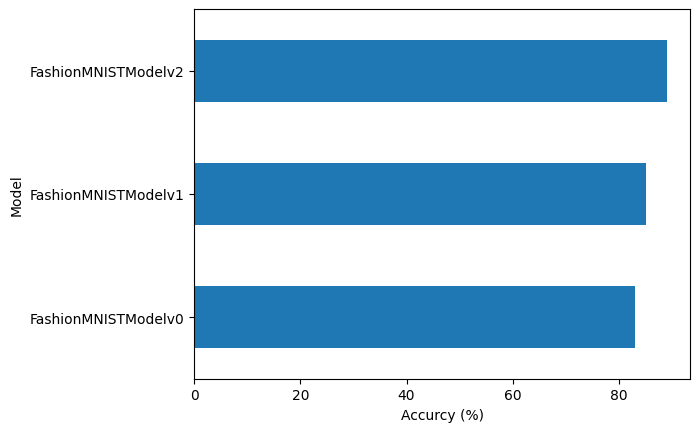

In [53]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("Accurcy (%)")
plt.ylabel("Model")

### **Make and Evaluate Random Predictions with Best Model**

Let's evaluate our best performing model `model_v2`, and make a function for that

In [54]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device:torch.device):
  pred_probs= []
  model.eval()

  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logit = model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(), dim =0)


      pred_probs.append(pred_prob.cpu())


    return torch.stack(pred_probs)

In [55]:
import random
random.seed(135)

test_samples = []
test_labels = []


for sample, label in random.sample(list(test_data), k= 9):
  test_samples.append(sample)
  test_labels.append(label)


print(f"Test Sample image shape: {test_samples[0].shape}")
print(f"Test Sample label: {test_labels[0]}")

Test Sample image shape: torch.Size([1, 28, 28])
Test Sample label: 6


In [56]:
# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_name[test_labels[0]]})")


Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 6 (Shirt)


In [57]:
# make predicitons
pred_probs = make_predictions(model=model_v2,
                              data=test_samples,
                              device=device)

print(f"Predictions shape: {pred_probs.shape}")

Predictions shape: torch.Size([9, 10])


In [58]:
pred_probs[:2]

tensor([[9.8109e-03, 1.5590e-06, 8.3024e-04, 2.9102e-04, 1.0164e-03, 2.6510e-07,
         9.8768e-01, 6.6404e-07, 3.7071e-04, 1.3495e-07],
        [8.5648e-03, 8.6200e-01, 5.1667e-02, 4.8296e-04, 7.0465e-03, 9.5843e-04,
         6.4296e-02, 1.0216e-05, 7.8470e-04, 4.1890e-03]])

In [59]:
# probabilites to predicitons
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([6, 1, 2, 5, 5, 0, 0, 5, 2])

In [60]:
test_labels, pred_classes

([6, 1, 2, 5, 5, 0, 0, 5, 2], tensor([6, 1, 2, 5, 5, 0, 0, 5, 2]))

### Visualize

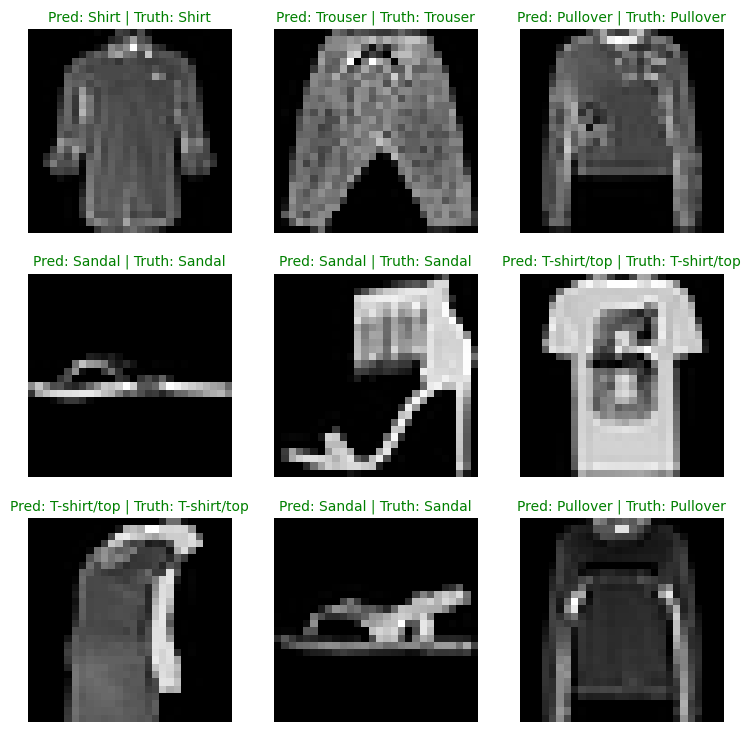

In [61]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_name[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_name[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

### Making Confusion Matrix

One of the many visuals you can make is the confusion matrix, it tells you where does your model got confused between predictions and truth

In [62]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_v2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_v2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

Now, we have the predicitons, we will make a confusion matrix using `torchmetrics.ConfusionMatrix` and plot it using `mlxtend.plotting.plot_confusion_matrix()`

In [63]:

# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.5/963.5 kB 47.4 MB/s eta 0:00:00
mlxtend version: 0.23.4
0.23.4


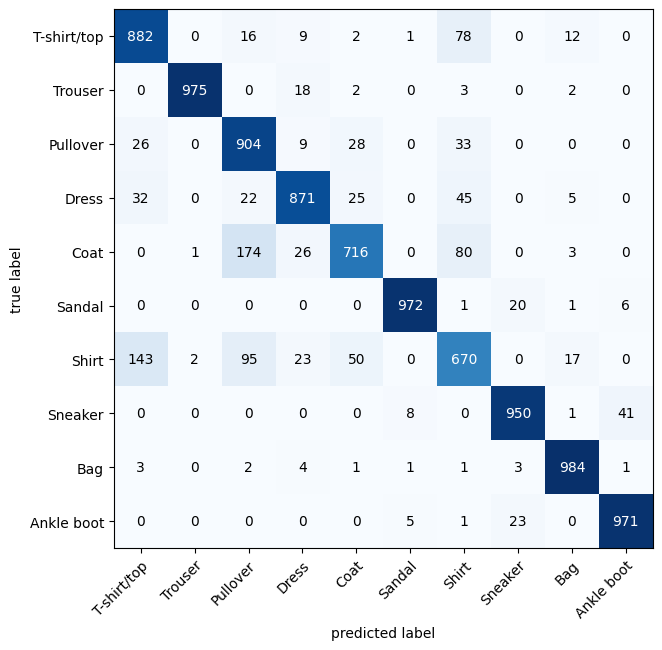

In [64]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_name), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_name, # turn the row and column labels into class names
    figsize=(10, 7)
);

### Save and Load best performing model

In [65]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_v2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


Since we have saved the learned parameters, we can bring it back as well

In [66]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelv2(input_shape=1,
                                    hidden_units=10, # try changing this to 128 and seeing what happens
                                    output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [67]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_func=loss_func,
    accuracy_fn=accuracy_fn,
    device=device
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelv2',
 'model_loss': 0.3038133382797241,
 'model_acc': 88.9576677316294}

In [68]:
model_v2_results

{'model_name': 'FashionMNISTModelv2',
 'model_loss': 0.3038133382797241,
 'model_acc': 88.9576677316294}